In [0]:
import pandas as pd
import os

def read_size_submissions(year_range = [2015, 2016, 2017], month_range = range(1, 13),):
    result = None
    for year in year_range:
        for month in month_range:
            month_literal = ""
            if month < 10:
                month_literal = "0" + str(month)
            else:
                month_literal = str(month)
            try:
                data_path = "/dbfs/mnt/lsde/datasets/reddit/submissions/RS_" + str(year) + "-" + month_literal + ".json.bz2"
                if result is None:
                    result = pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])
                else:
                    result = pd.concat([result, pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])])
            except:
                print("RS_" + str(year) + "-" + month_literal + " does not exist.")
    return result

In [0]:
def read_size_comments(year_range = [2015, 2016, 2017], month_range = range(1, 13)):
    result = None
    for year in year_range:
        for month in month_range:
#             month_literal = ""
#             if month < 10:
#                 month_literal = "0" + str(month)
#             else:
#                 month_literal = str(month)
            month_literal = str(month)
            data_path = "/dbfs/mnt/lsde/group05/comments_tree_shaking/" + str(year) + "-" + month_literal + ".parquet"
            try:
                if result is None:
                    result = pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])
                else:
                    result = pd.concat([result, pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])])
            except:
                print(data_path + " does not exist")
    return result

In [0]:
def read_size_submissions(year_range = [2015, 2016, 2017], month_range = range(1, 13)):
    result = None
    for year in year_range:
        for month in month_range:
#             month_literal = ""
#             if month < 10:
#                 month_literal = "0" + str(month)
#             else:
#                 month_literal = str(month)
            month_literal = str(month)
            data_path = "/mnt/lsde/group05/kwfilter_top3/" + str(year) + "-" + month_literal + ".parquet" 
            try:
                count = spark.read.parquet(data_path).count()
                if result is None:
                    result = pd.DataFrame([[str(year) + "-" + str(month), count]], columns=["date", "size"])
                else:
                    result = pd.concat([result, pd.DataFrame([[str(year) + "-" + str(month), count]], columns=["date", "size"])])
            except:
                print(data_path + " does not exist")
    return result

In [0]:
def read_size_comments_deprecated(year_range = [2015, 2016, 2017], month_range = range(1, 13)):
    result = None
    for year in year_range:
        for month in month_range:
            month_literal = ""
            if month < 10:
                month_literal = "0" + str(month)
            else:
                month_literal = str(month)
            # month_literal = str(month)
            data_path = "/dbfs/mnt/lsde/datasets/reddit/comments/RC_" + str(year) + "-" + month_literal + ".json.bz2"
            try:
                if result is None:
                    result = pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])
                else:
                    result = pd.concat([result, pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])])
            except:
                print(data_path + " does not exist")
    return result

In [0]:
def read_size_submissions_deprecated(year_range = [2015, 2016, 2017], month_range = range(1, 13)):
    result = None
    for year in year_range:
        for month in month_range:
            month_literal = ""
            if month < 10:
                month_literal = "0" + str(month)
            else:
                month_literal = str(month)
            # month_literal = str(month)
            data_path = "/dbfs/mnt/lsde/datasets/reddit/submissions/RS_" + str(year) + "-" + month_literal + ".json.bz2"
            try:
                if result is None:
                    result = pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])
                else:
                    result = pd.concat([result, pd.DataFrame([[str(year) + "-" + str(month), os.stat(data_path).st_size / (1024 * 1024)]], columns=["date", "size"])])
            except:
                print(data_path + " does not exist")
    return result

In [0]:
sizes = read_size_submissions(year_range=range(2014, 2023), month_range = [3])

Out[34]:

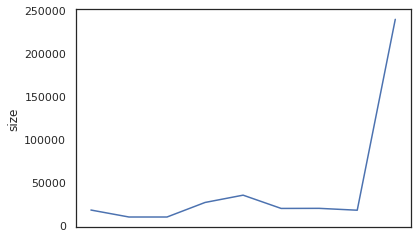

[Text(0.5, 0, '')]

In [0]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style(style='white')
# Create a visualization
comments_change = sns.lineplot(data=sizes, x="date", y="size")# Create a visualization
comments_change.set(xticklabels=[])  # remove the tick labels
comments_change.set(xlabel=None)  # remove the axis label

In [0]:
sizes

Out[35]:

,date,size
0,2014-3,17220
0,2015-3,9089
0,2016-3,9084
0,2017-3,26053
0,2018-3,34562
0,2019-3,19087
0,2020-3,19186
0,2021-3,17003
0,2022-3,239599


In [0]:
sizes["size"].sum()

Out[36]: 390883